Print first rotation matrix R1 :
[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]
Print scaling  matrix S with Eigen values in diagonals:
[[1.38196601 0.        ]
 [0.         3.61803399]]
Print second rotation matrix R2 which has eigen vectors of B as column vectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]
Original Vectors:


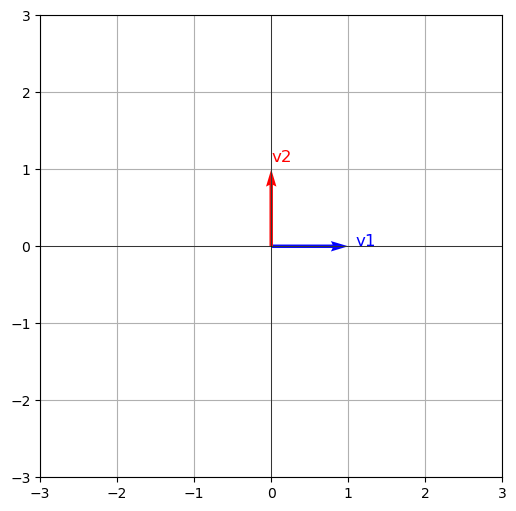

After applying R1 (rotation):


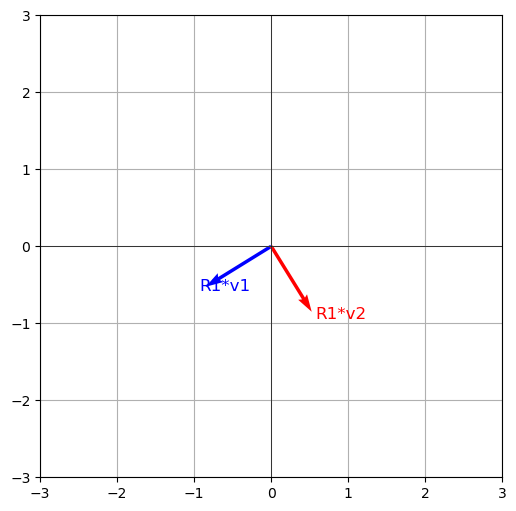

After applying S (scaling):


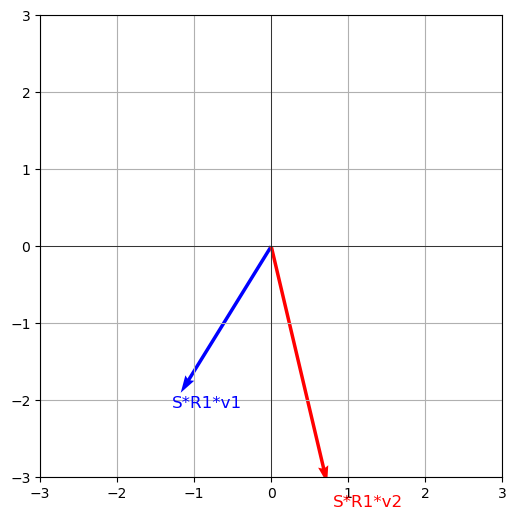

After applying R2 (rotation):


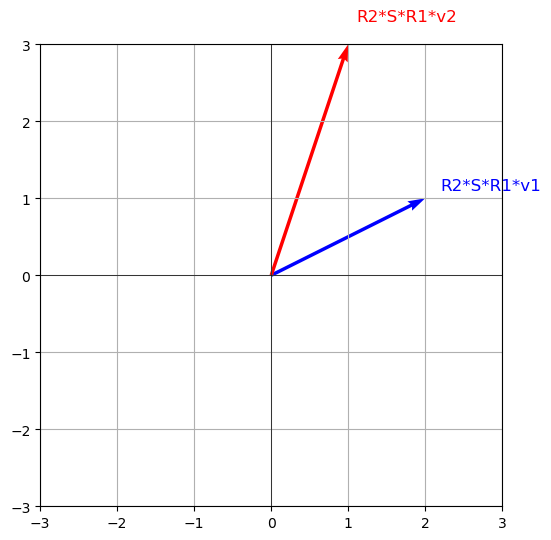

Final vectors (Directly applying B):


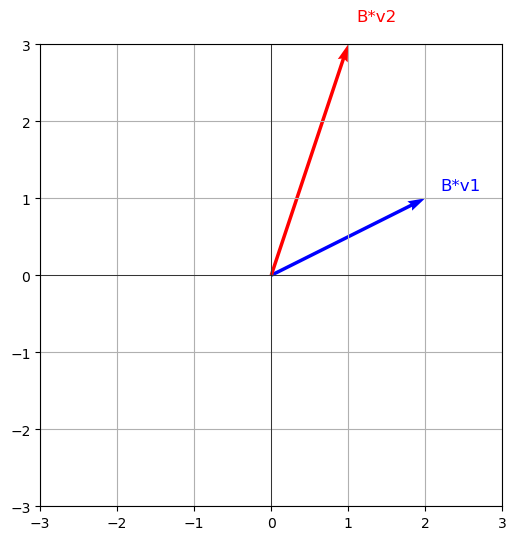

Do the vectors after R1, S, and R2 match the direct application of B?
Vectors after R2*S*R1:
 [[2. 1.]
 [1. 3.]]
Vectors after applying B directly:
 [[2 1]
 [1 3]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot vectors
def plot_vectors(vectors, colors=['b', 'r', 'g'], labels=None):
    plt.figure(figsize=(6, 6))
    for i, vector in enumerate(vectors):
        plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=colors[i])
        if labels:
            plt.text(vector[0] * 1.1, vector[1] * 1.1, labels[i], fontsize=12, color=colors[i])
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Function to perform the rotation-scaling-rotation decomposition
def rotation_scaling_rotation_decomposition(matrix):
    # Eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    P = eigenvectors
    D = np.diag(eigenvalues)
    P_inv = np.linalg.inv(P)

    
    # Rotation matrices
   
    R1 = P_inv
    R2 = P
    
    # Scaling matrix
    S = D
    
    return R1, S, R2

# Function to apply the transformation
def apply_transformation(matrix, vectors):
    return np.dot(matrix, vectors.T).T

# Given 2D non-singular matrix
B = np.array([[2, 1],
              [1, 3]])

# Decompose B into R1, S, R2
R1, S, R2 = rotation_scaling_rotation_decomposition(B)

print("Print first rotation matrix R1 :")
print (R1)
print("Print scaling  matrix S with Eigen values in diagonals:")
print (S)
print("Print second rotation matrix R2 which has eigen vectors of B as column vectors:")
print (R2)



# Example vectors to transform (unit vectors along x and y axes)
original_vectors = np.array([[1, 0], 
                             [0, 1]])

# Apply the transformations
vectors_after_R1 = apply_transformation(R1, original_vectors)
vectors_after_S = apply_transformation(S, vectors_after_R1)
vectors_after_R2 = apply_transformation(R2, vectors_after_S)
final_vectors = apply_transformation(B, original_vectors)

# Plotting the original and transformed vectors
print("Original Vectors:")
plot_vectors(original_vectors, colors=['b', 'r'], labels=['v1', 'v2'])

print("After applying R1 (rotation):")
plot_vectors(vectors_after_R1, colors=['b', 'r'], labels=["R1*v1", "R1*v2"])

print("After applying S (scaling):")
plot_vectors(vectors_after_S, colors=['b', 'r'], labels=["S*R1*v1", "S*R1*v2"])

print("After applying R2 (rotation):")
plot_vectors(vectors_after_R2, colors=['b', 'r'], labels=["R2*S*R1*v1", "R2*S*R1*v2"])

print("Final vectors (Directly applying B):")
plot_vectors(final_vectors, colors=['b', 'r'], labels=["B*v1", "B*v2"])

# Comparison of the final result and direct application of B
print("Do the vectors after R1, S, and R2 match the direct application of B?")
print("Vectors after R2*S*R1:\n", vectors_after_R2)
print("Vectors after applying B directly:\n", final_vectors)


# LAB Question: (i) Take your own symmetric matrix with  non-zero determinant as the input matrix.
#                  Then plot what happens to the square  S with vertices [0, 0], [1, 0], [1, 1], [0, 1] when
#                    a linear transformation with matrix of T as B is applied to it.
#                (ii) What is the area of resultant figure T(S)?

